# Podstawy reprezentacji i analizy danych – projekt

 #### Analizowanie danych sprzedanych samochodów z Niemczech i Czech za 2015 rok
Projekt realizowany w ramach laboratorium z _Analizy Danych_ prowadzonych przez dr hab. inż. Marcin Iwanowski.

Wykonali:
 - Ivan Prakapets
 - Aleh Yarkavets

## 1. Opis postawionego problemu

Dane zostały zeskrobane z wielu stron internetowych w Czechach i Niemczech w ciągu ponad roku.Za pomocą portalu _https://www.kaggle.com/mirosval/personal-cars-classifieds_ dane zostały ściągniete. Dane zawierają wiele interesujących informacji na temat samochodów. 
Naszym zadaniem jest, wykorzystując wiedzę zdobytą na laboratoriach oraz po za laboratoriach, by za pomocą tych danych przeprowadzić badania eksploracyjne. Korzystać będziemy z danych samochódow.

#### Opis danych

Ma około 3,5 miliona wierszy i takich kolumn:

* **maker** - marka samochodu
* **model** - model samochodu
* **mileage** - przebieg w KM
* **manufacture_year** - rok budowy  
* **engine_displacement** - pojemność silnika w santymetrach kubowych
* **engine_power** - moc silnikaw w kW
* **body_type** - typ nadwozia
* **color_slug** - kolor
* **stk_year** - rok ostatniej kontroli emisji
* **transmission** - skrzynia biegów automatyczna lub manualna
* **door_count** - ilość drzwi 
* **seat_count** - ilość miejsc dla siedzenia
* **fuel_type** - rodzaj paliwa: benzyna, diesel, LNG, lpg, elektryczny
* **date_created** - data ogłoszenia
* **date_last_seen** - czas ostatniego wyświetlenia reklamy.
* **price_eur** - cennik, przekonwertowany w EUR

## 2. Przygotowanie środowiska

In [2]:
import numpy as np # funkcją jest dostarczenie użytkownikowi efktywnych 
                   #struktur danych do przechowywania danych wykorzystywanych w eksploracji
import pandas as pd # macierz danych nazywana tutaj ramką danych

import matplotlib.pyplot as plt #pakiet do przeliczania danych
import seaborn as sns #pakiet do tworzenia wykresów


from operator import is_not
from functools import partial  

from sklearn.model_selection import train_test_split
from sklearn.neighbors import NearestNeighbors
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neighbors import NearestCentroid
from sklearn.naive_bayes import GaussianNB
from sklearn import tree

### 3. Wczytanie danych i przygotowanie do analizy

In [3]:
all_data = pd.read_csv("all_anonymized_2015_11_2017_03.csv", low_memory=False)

## 4. Podstawowe parametry danych

In [4]:
print(f"Liczba obiektów: {len(all_data)}.\n")
print(f"Każdy obiekt opisują {len(list(all_data))} atrybuty.\n")
brak=all_data.isna().sum().sum()
ob_z_brak=all_data.isna().sum(axis=1).value_counts()[1]
at_brak=all_data.isna().sum()
print('Wszystkie braki: {}\n'.format(brak))
print('Obiekty brak: {}\n'.format(ob_z_brak))
print('Atr: {}\n'.format(at_brak))

Liczba obiektów: 3552912.

Każdy obiekt opisują 16 atrybuty.

Wszystkie braki: 13811308

Obiekty brak: 118314

Atr: maker                   518915
model                  1133361
mileage                 362584
manufacture_year        370578
engine_displacement     743414
engine_power            554877
body_type              1122914
color_slug             3343411
stk_year               1708156
transmission            741630
door_count              614373
seat_count              749489
fuel_type              1847606
date_created                 0
date_last_seen               0
price_eur                    0
dtype: int64



 **Wniosek:** Powyżej zaobserwowaliśmy, że mamy dużo brakujących danych, powinniśmy wyczyszczyć te brakujące dane.

In [5]:
data_delete = all_data.dropna()
ile_brakow  = data_delete.isnull().sum().sum()
print('Ilosc brakow: {}\n'.format(ile_brakow))

Ilosc brakow: 0



In [6]:
l_obiektow = len(data_delete)
l_atrybutow = len(list(data_delete))

print('Liczba obiektów: {}'.format(l_obiektow))
print('Liczba atrybutów: {}\n'.format(l_atrybutow))

Liczba obiektów: 4227
Liczba atrybutów: 16



**Wniosek:** Powyżej jest pokazana liczba obiektów do analizy oraz liczba atrybutów do analizy.

## 5. Usuwanie nie potrzebnych column z danych.

Zdecedowaliśmy, że kilka kolumn są nie potrzebni, dla tego, że w nich nie ma żadnej sensownej informacji. Dla tego ich usuwamy.

In [7]:
data_delete = data_delete.drop("engine_power", 1)
data_delete = data_delete.drop("body_type", 1)
data_delete = data_delete.drop("color_slug", 1)
data_delete = data_delete.drop("stk_year", 1)
data_delete = data_delete.drop("door_count", 1)
data_delete = data_delete.drop("seat_count", 1)

In [8]:
data_delete.head()

,maker,model,mileage,manufacture_year,engine_displacement,transmission,fuel_type,date_created,date_last_seen,price_eur
1075903,toyota,yaris,31696.0,2011.0,1329.0,man,gasoline,2016-01-06 19:25:07.416766+00,2016-01-17 13:19:36.517081+00,9490.0
1075935,citroen,c1,75800.0,2008.0,998.0,man,gasoline,2016-01-06 19:25:12.730673+00,2016-07-03 17:02:11.724649+00,4000.0
1075943,nissan,note,9944.0,2014.0,1198.0,man,gasoline,2016-01-06 19:25:14.051308+00,2016-07-03 18:52:28.778609+00,10000.0
1075945,fiat,coupe,185000.0,1994.0,1995.0,man,gasoline,2016-01-06 19:25:14.140026+00,2016-07-03 17:08:12.419445+00,2000.0
1076052,opel,meriva,14357.0,2015.0,1398.0,man,gasoline,2016-01-06 19:25:23.621672+00,2016-01-17 13:20:31.87436+00,12998.0


In [9]:
l_atrybutow = len(list(data_delete))

print('Liczba atrybutów: {}\n'.format(l_atrybutow))

Liczba atrybutów: 10



**Wniosek:** zmniejszyliśmy z 16 atrybutów, do 10 potrzebnych dla analizy.  Powyżyj jest wynik usuwania kolumn.

## 6. Wyznaczenie zakresów zmienności poszczególnych atrybutów

#### Wyznaczamy zakresy zmiennności i inne dane opisujące atrybuty.

In [10]:
data_delete.describe()

,mileage,manufacture_year,engine_displacement,price_eur
count,4.227000e+03,4227.000000,4227.000000,4227.000000
mean,1.106903e+05,2006.965933,1742.852614,10510.462976
std,8.553887e+04,6.306891,772.059977,21558.048362
min,0.000000e+00,1955.000000,68.000000,500.000000
25%,5.303900e+04,2004.000000,1248.000000,3499.000000
50%,1.000000e+05,2008.000000,1597.000000,6700.000000
75%,1.564760e+05,2011.000000,1984.000000,12492.500000
max,2.200000e+06,2016.000000,12000.000000,911999.000000


**Wnioski:** Powyżej zauważyliśmy, że nie wszystkie dane zostały wczytane do _describe_. Prawdopodobnie wynika to z tego, iż pozostałe dane nie posiadają wartości liczbowych. Sprawdźmy więc jakiego typu są nasze dane.

In [11]:
data_delete.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4227 entries, 1075903 to 1388289
Data columns (total 10 columns):
maker                  4227 non-null object
model                  4227 non-null object
mileage                4227 non-null float64
manufacture_year       4227 non-null float64
engine_displacement    4227 non-null float64
transmission           4227 non-null object
fuel_type              4227 non-null object
date_created           4227 non-null object
date_last_seen         4227 non-null object
price_eur              4227 non-null float64
dtypes: float64(4), object(6)
memory usage: 363.3+ KB


**Wnioski:** Okazuje się, że brakujące dane są typu _object_. Sprawdzimy, czy zmiana na typ kategoryczny poprawi rezultaty.

**Rozwiązanie:** Korzystając z _pprint_ dla każdego atrybutu typu _obiject_ trzeba wprowadzić funkcję _vars_.

In [12]:
from pprint import pprint; 
pprint(vars(data_delete.maker))
print('\n-------------------------------------------------------------------------\n')
pprint(vars(data_delete.model))
print('\n-------------------------------------------------------------------------\n')
pprint(vars(data_delete.transmission))
print('\n-------------------------------------------------------------------------\n')
pprint(vars(data_delete.fuel_type))
print('\n-------------------------------------------------------------------------\n')
pprint(vars(data_delete.date_created))
print('\n-------------------------------------------------------------------------\n')
pprint(vars(data_delete.transmission))
print('\n-------------------------------------------------------------------------\n')
pprint(vars(data_delete.date_last_seen))
print('\n-------------------------------------------------------------------------\n')

{'_cacher': ('maker',
             <weakref at 0x0000018880004958; to 'DataFrame' at 0x00000188D3A8A6A0>),
 '_data': SingleBlockManager
Items: Int64Index([1075903, 1075935, 1075943, 1075945, 1076052, 1076058, 1076063,
            1076078, 1076216, 1076697,
            ...
            1387995, 1388053, 1388054, 1388127, 1388129, 1388136, 1388164,
            1388235, 1388278, 1388289],
           dtype='int64', length=4227)
ObjectBlock: 4227 dtype: object,
 '_index': Int64Index([1075903, 1075935, 1075943, 1075945, 1076052, 1076058, 1076063,
            1076078, 1076216, 1076697,
            ...
            1387995, 1388053, 1388054, 1388127, 1388129, 1388136, 1388164,
            1388235, 1388278, 1388289],
           dtype='int64', length=4227),
 '_is_copy': None,
 '_item_cache': {},
 '_name': 'maker',
 '_subtyp': 'series'}

-------------------------------------------------------------------------

{'_cacher': ('model',
             <weakref at 0x0000018880004958; to 'DataFrame' at 0x0

## 7. Wnioski z analizy atrybutów

Data jest zrobiona w formacie unix timestamp, co dla nas jest nie za bardzo potrzebne, dlatego skonwertujemy ją do zwykłego formatu date

In [13]:
data_delete['date_created'] = pd.to_datetime(data_delete['date_created']).dt.date
data_delete['date_last_seen'] = pd.to_datetime(data_delete['date_last_seen']).dt.date

In [14]:
data_delete.head()

,maker,model,mileage,manufacture_year,engine_displacement,transmission,fuel_type,date_created,date_last_seen,price_eur
1075903,toyota,yaris,31696.0,2011.0,1329.0,man,gasoline,2016-01-06,2016-01-17,9490.0
1075935,citroen,c1,75800.0,2008.0,998.0,man,gasoline,2016-01-06,2016-07-03,4000.0
1075943,nissan,note,9944.0,2014.0,1198.0,man,gasoline,2016-01-06,2016-07-03,10000.0
1075945,fiat,coupe,185000.0,1994.0,1995.0,man,gasoline,2016-01-06,2016-07-03,2000.0
1076052,opel,meriva,14357.0,2015.0,1398.0,man,gasoline,2016-01-06,2016-01-17,12998.0


**Wnioski:** Zbadajmy iłóść unikalnych marek i modelów

In [15]:
print(len(data_delete.groupby('maker').size()), 'different makers')
print(len(data_delete.groupby('model').size()), 'different model')

35 different makers
295 different model


In [16]:
data_delete.describe()

,mileage,manufacture_year,engine_displacement,price_eur
count,4.227000e+03,4227.000000,4227.000000,4227.000000
mean,1.106903e+05,2006.965933,1742.852614,10510.462976
std,8.553887e+04,6.306891,772.059977,21558.048362
min,0.000000e+00,1955.000000,68.000000,500.000000
25%,5.303900e+04,2004.000000,1248.000000,3499.000000
50%,1.000000e+05,2008.000000,1597.000000,6700.000000
75%,1.564760e+05,2011.000000,1984.000000,12492.500000
max,2.200000e+06,2016.000000,12000.000000,911999.000000


In [17]:
data_delete[data_delete['mileage']==data_delete['mileage'].min()]

,maker,model,mileage,manufacture_year,engine_displacement,transmission,fuel_type,date_created,date_last_seen,price_eur
1093856,fiat,500,0.0,2015.0,1242.0,man,gasoline,2016-01-07,2016-07-03,9748.0
1101557,ford,c-max,0.0,2015.0,998.0,man,gasoline,2016-01-08,2016-07-03,16990.0
1123825,smart,fortwo,0.0,2014.0,999.0,man,gasoline,2016-01-09,2016-01-19,9900.0
1191397,kia,venga,0.0,2015.0,1591.0,man,gasoline,2016-01-12,2016-01-20,14490.0
1215845,ford,escort,0.0,1986.0,1597.0,man,gasoline,2016-01-13,2016-01-20,595.0
1272860,fiat,500l,0.0,2015.0,1248.0,man,diesel,2016-01-16,2016-01-20,15500.0
1273589,fiat,500x,0.0,2015.0,1368.0,auto,gasoline,2016-01-16,2016-01-20,19999.0
1347123,toyota,auris,0.0,2015.0,1598.0,man,diesel,2016-01-23,2016-01-26,18830.0
1371809,ford,escort,0.0,1986.0,1597.0,man,gasoline,2016-01-26,2016-07-03,595.0
1381109,skoda,fabia,0.0,2015.0,999.0,man,gasoline,2016-01-27,2016-07-03,12450.0


**Wnioski:** Widzimy, że niektóre samochody mają przebieg równy 0, to napewno jest błąd pobierania danych, bo autor mówi nam, że to jest baza używanych samochów

In [18]:
data_delete[data_delete['mileage']==data_delete['mileage'].max()]

,maker,model,mileage,manufacture_year,engine_displacement,transmission,fuel_type,date_created,date_last_seen,price_eur
1155298,seat,arosa,2200000.0,1999.0,1390.0,man,gasoline,2016-01-10,2016-07-03,1000.0


**Wnioski:** Maksymalny przebieg jset 2200000km, to napewno też jest błąd, bo bardzo trudno uwierzyć że samochód całkiem nie zepsuł się z takim przebegiem.

### Najczęściej kupowane marki

In [19]:
dfObj = data_delete.groupby(['maker']).size().reset_index(name='count')
dfObj = dfObj.sort_values('count', ascending=False)
dfObj

,maker,count
25,opel,629
7,fiat,505
8,ford,472
5,citroen,437
0,audi,299
30,smart,174
33,toyota,170
28,seat,164
22,mini,139
24,nissan,134


Teraz wyśwetimy w jakich miesiącach były sprzedawane samochody

In [20]:
data_delete.groupby([data_delete['date_last_seen']]).mean()

,mileage,manufacture_year,engine_displacement,price_eur
date_last_seen,,,,
2016-01-17,93710.622642,2007.566038,1660.490566,11971.056604
2016-01-18,76485.086957,2009.217391,1792.391304,11516.913043
2016-01-19,108449.322581,2006.877419,1738.467097,11278.509677
2016-01-20,104414.123457,2007.112233,1698.039282,10186.111111
2016-01-21,107365.818182,2005.886364,1630.500000,9641.977273
2016-01-22,116978.506173,2006.086420,1908.111111,14526.950617
2016-01-23,103918.574074,2004.796296,1719.518519,11418.537037
2016-01-24,89640.271186,2009.474576,1660.508475,13014.457627
2016-01-25,100433.823529,2007.588235,1668.607843,8783.343137


## 8. Analiza korelacji

### Histogramy dla kazdego atrybuty typu _float_

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001888009B5C0>,
      dtype=object)

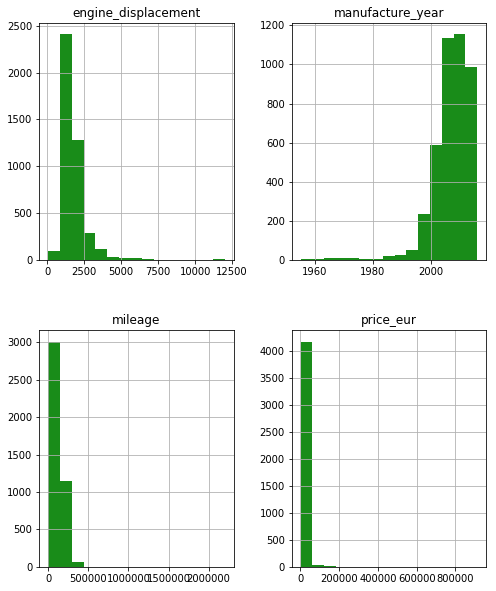

In [21]:
data_delete.hist(color='g', alpha=0.9, bins=15, figsize = (8,10))


**Wnioski:**
* Większość samochodów mają pojemność silnika 1.8
* Samochody z mają pojemnością silnika powyżej 4.0 prawie nie sprzedają się
* Jeżeli chodzi o rok budowy samochoda, większość samochodów jest sprzedane po formule (current_year - 10 years)  
* Samochody wyprodukowane do 1980 - samochody luksusowe
* Większość samochodów ma dobry przebieg
* Są samochody które w bardzo złym stanie - przebieg powyżej 400000
* Są samochody używane, kosztujące ok 200000 EUR

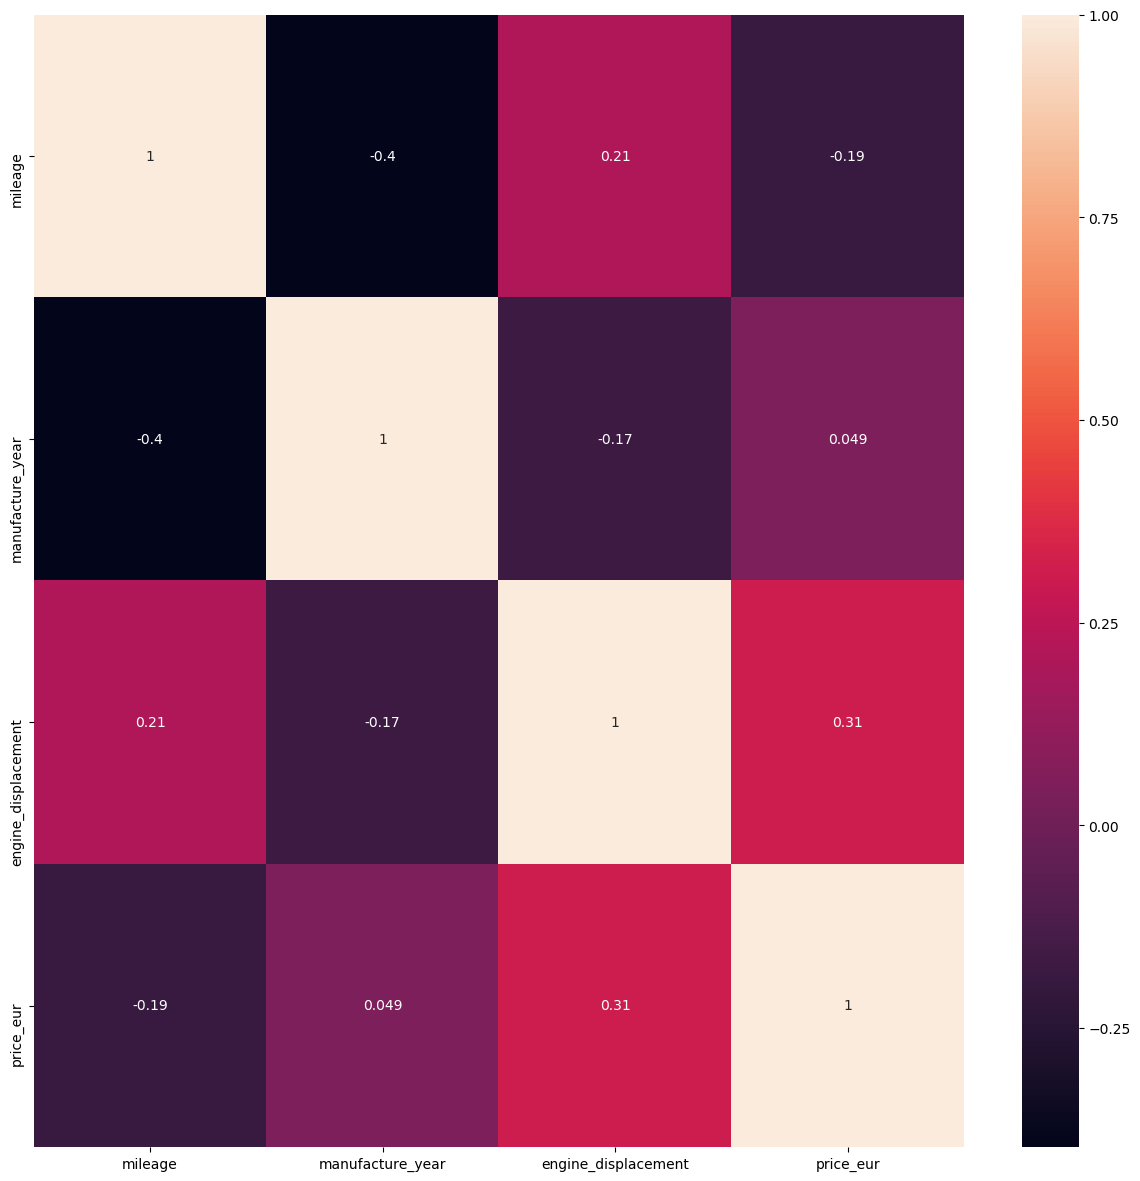

In [29]:
plt.figure(figsize=(15, 15), dpi = 100)
sns.heatmap(data_delete.corr(), annot = data_delete.corr())

Koralacja atybutów cen

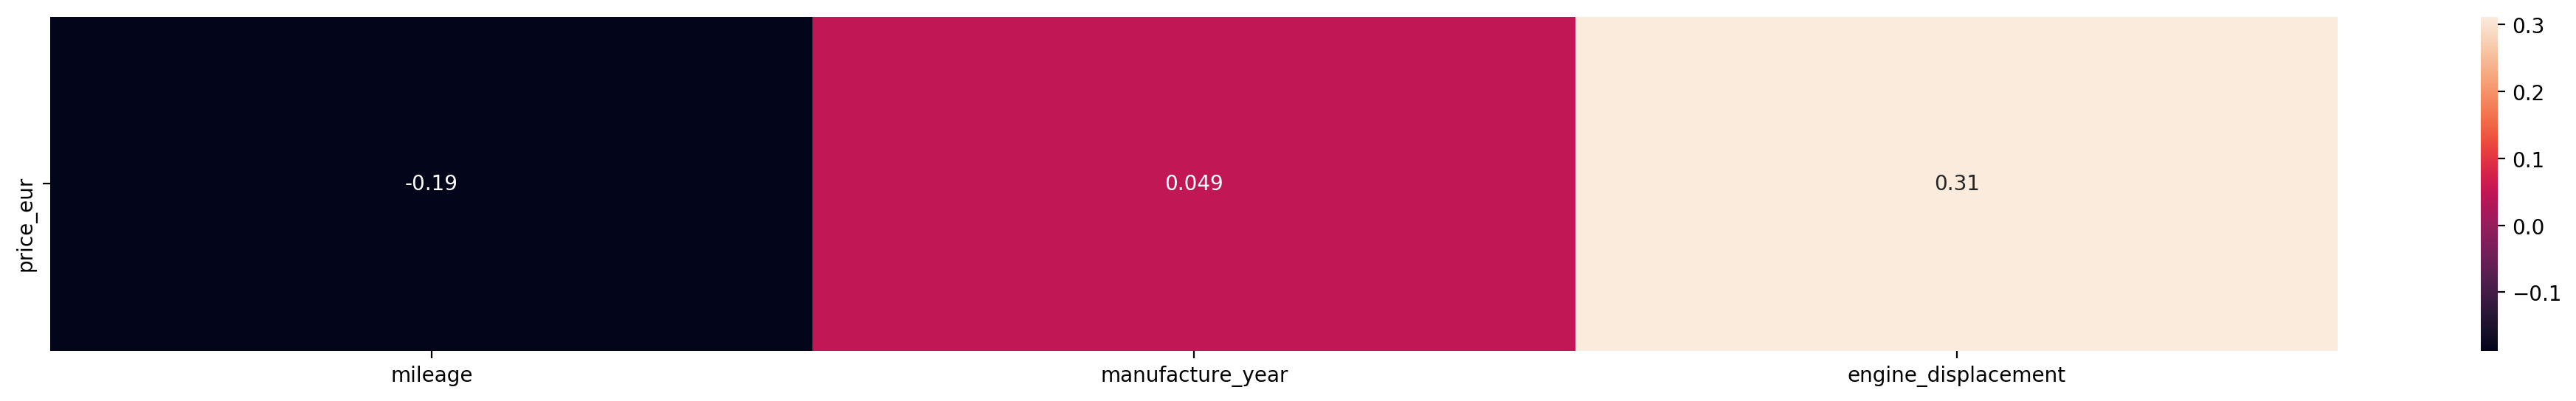

In [30]:
korCena = data_delete.corr().iloc[-1:, :-1]

plt.figure(figsize=(25, 3), dpi = 200)
sns.heatmap(korCena, annot = korCena)

In [31]:
korAtr = korCena.mean()

sortedAtr = korAtr.abs().sort_values()
sortedAtr = pd.DataFrame(sortedAtr, columns=["Korelacja z cenami"])
sortedAtr.index.name = "Atrybut"

sortedAtr.head(10)

,Korelacja z cenami
Atrybut,
manufacture_year,0.049127
mileage,0.187084
engine_displacement,0.311508


**Wnioski:**
* Jak widzimy najmniejszy wpływ na cenę rok budowy samochodu. Potem jest przbieg, który ustawia ceny, ale nie w takim stopniu, jak pojemność silnika.

## 9. Testy klasyfikatorów

In [33]:
def podziel(data_delete,proporcja):
    # dzieli macierz (ramkę) danych na zbiór uczacy i testowy
    # df - ramka danych; proporcja - proporcja podzialu (0-1)
    # zwraca słownik z kluczami:
    # opis_ucz/opis_test - macierz atrybutów opisujących zbioru uczącego/testowego
    # dec_ucz/dec_test - wektor wartosci atrybutu decyzyjnego zbioru uczącego/testowego
    # uwaga: atrybut opisujący jest zawsze na końcu (ostatnia kolumna ramki)
    opis_ucz, opis_test, dec_ucz, dec_test = train_test_split(data_delete.iloc[:,0:-1], data_delete.iloc[:,-1].astype('category').cat.codes, test_size=proporcja)#, random_state=0)
    return {"opis_ucz":opis_ucz, "opis_test":opis_test, "dec_ucz":dec_ucz, "dec_test":dec_test}

def weryfikuj(model,dane,atryb):
    # wyswietla wynik weryfikacji klasyfikatora w postaci macierzy pomyłek
    # dla zbioru uczącego i testowego
    # model - model klasyfikatora
    # dane - dane (słownik zwracany przez funkcje podziel)
    # atryb - lista atrybutów uwzględnianych w weryfikacji
    model.fit(dane["opis_ucz"].iloc[:,atryb], dane["dec_ucz"])
    wynik_ucz = model.predict(dane["opis_ucz"].iloc[:,atryb])
    wynik_test = model.predict(dane["opis_test"].iloc[:,atryb])
    print("Macierz pomyłek dla zbioru uczącego")
    print(pd.crosstab(dane["dec_ucz"],wynik_ucz)) 
    print("Macierz pomyłek dla zbioru testowego")
    print(pd.crosstab(dane["dec_test"],wynik_test))
    
dane = podziel(data_delete,0.3)
print('Liczba obiektów zbioru uczącego: ', len(dane["opis_ucz"]))
print('Liczba obiektów zbioru testowego: ', len(dane["opis_test"]))

Liczba obiektów zbioru uczącego:  2958
Liczba obiektów zbioru testowego:  1269


### Klasyfikacja przy pomocy modelu najbliższych sąsiadów

In [35]:
atrybuty = [2,3,4]

In [36]:
    model = KNeighborsClassifier(n_neighbors=3)
    weryfikuj(model,dane,atrybuty)

Macierz pomyłek dla zbioru uczącego
col_0  0    1    2    3    4    5    6    7    8    9    ...  885  887  891  \
row_0                                                    ...                  
0       13    0    0    0    0    0    0    0    0    0  ...    0    0    0   
1        0    1    0    0    0    0    0    0    0    0  ...    0    0    0   
2        0    0    1    0    0    0    0    0    0    0  ...    0    0    0   
3        0    0    0    1    0    0    0    0    0    0  ...    0    0    0   
4        0    0    0    0    1    0    0    0    0    0  ...    0    0    0   
5        0    0    0    0    0    1    0    0    0    0  ...    0    0    0   
6        1    0    0    0    0    0    4    0    0    0  ...    0    0    0   
7        0    0    0    0    0    0    0    4    0    0  ...    0    0    0   
8        0    0    0    0    0    0    0    0    1    0  ...    0    0    0   
9        0    0    0    0    0    0    0    0    0    1  ...    0    0    0   
10       0    0 

### Klasyfikacja przy pomocy modelu statystycznego Gaussa

In [37]:
model = GaussianNB()
weryfikuj(model,dane,atrybuty)

Macierz pomyłek dla zbioru uczącego
col_0  0     1     2     3     4     5     6     8     9     10    ...  988   \
row_0                                                              ...         
0         0     0     0     0     0     0     1     0     0     0  ...     0   
1         0     1     0     0     0     0     0     0     0     0  ...     0   
2         0     0     1     0     0     0     0     0     0     0  ...     0   
3         0     0     0     1     0     0     0     0     0     0  ...     0   
4         0     0     0     0     1     0     0     0     0     0  ...     0   
5         0     0     0     0     0     1     0     0     0     0  ...     0   
6         0     0     0     0     0     0     1     0     0     0  ...     0   
7         0     0     0     0     0     0     1     0     0     0  ...     0   
8         0     0     0     0     0     0     0     1     0     0  ...     0   
9         0     0     0     0     0     0     0     0     1     0  ...     0   
10  

### Klasyfikacja przy pomocy modelu drzewa decyzyjne

In [38]:
model = tree.DecisionTreeClassifier(max_depth=6)
weryfikuj(model,dane,atrybuty)

Macierz pomyłek dla zbioru uczącego
col_0  0    26   39   49   67   68   78   82   101  126  ...  582  588  607  \
row_0                                                    ...                  
0        4    6    0    2    0    0    0    0    0    0  ...    0    0    0   
1        0    1    0    0    0    0    0    0    0    0  ...    0    0    0   
2        0    1    0    0    0    0    0    0    0    0  ...    0    0    0   
3        0    1    0    0    0    0    0    0    0    0  ...    0    0    0   
4        0    0    0    0    0    1    0    0    0    0  ...    0    0    0   
5        1    0    0    0    0    0    0    0    0    0  ...    0    0    0   
6        1    4    0    0    0    0    0    0    0    0  ...    0    0    0   
7        0    2    0    2    0    0    0    0    0    0  ...    0    0    0   
8        0    0    0    1    0    0    0    0    0    0  ...    0    0    0   
9        0    1    0    0    0    0    0    0    0    0  ...    0    0    0   
10       1    2 

### Klasyfikacja przy pomocy modelu najbliższych prototypów

In [40]:
model = NearestCentroid()
weryfikuj(model,dane,atrybuty)

Macierz pomyłek dla zbioru uczącego
col_0  0     1     2     3     4     5     6     7     8     9     ...  988   \
row_0                                                              ...         
0         0     0     0     0     0     0     0     1     0     0  ...     0   
1         0     1     0     0     0     0     0     0     0     0  ...     0   
2         0     0     1     0     0     0     0     0     0     0  ...     0   
3         0     0     0     1     0     0     0     0     0     0  ...     0   
4         0     0     0     0     1     0     0     0     0     0  ...     0   
5         0     0     0     0     0     1     0     0     0     0  ...     0   
6         0     0     0     0     0     0     0     0     0     0  ...     0   
7         0     0     0     0     0     0     1     0     0     0  ...     0   
8         0     0     0     0     0     0     0     0     1     0  ...     0   
9         0     0     0     0     0     0     0     0     0     1  ...     0   
10  

[560 rows x 508 columns]


## Wnioski z klasyfikatorów:

Przy testowaniu różnymi klasyfikatorami, na podstawie błędów macierzy zauważyliśmy,że klasyfikator modelu najbliższych prototy najbardziej pasuje do naszego zbioru danych.

# 10. Ogólne wnioski: 

Zbadaliśmy zbiór danych na temat sprzedanych samochodów, dowiedzieliśmy, których samochodów warto kupować, a których nie. Analiza zbioru danych przy pomocy narzędzi analizy danych pozwala na zaobserwowanie ciekawych korelacji. Dobór klasyfikatora przeprowadziliśmy metodą prób i błędów. Bardzo ciezsymy się, że mieliśmy taką fajną pracę i zbiór.